In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

In [3]:
train_data = pd.read_csv('./digit-recognizer/train.csv')
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data = pd.read_csv('./digit-recognizer/test.csv')
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 資料觀察
- Check null: 資料沒有缺失
- Label 數量: 分布平均

In [5]:
# Check null
train_data.isnull().sum().sum()

0

<AxesSubplot:xlabel='label', ylabel='count'>

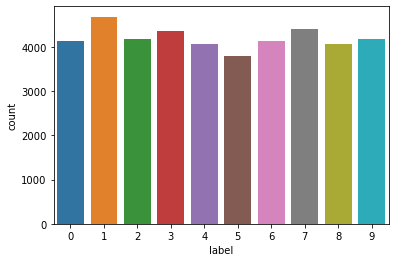

In [6]:
# Label 數量
sns.countplot(x='label', data=train_data)

## 資料前處理

In [7]:
# 將 row data 轉換成 Image(array)
train_data_re = train_data.drop('label', axis = 1).values.reshape(len(train_data),28,28,1)

test_data_re = test_data.values.reshape(len(test_data),28,28,1)

train_data_re[0].shape

(28, 28, 1)

In [8]:
# Normalize
train_x = train_data_re / 255
train_y = train_data['label']

test_x = test_data_re / 255

val_x = train_x[:5000]
val_y = train_y[:5000]

## Model 建置

In [9]:
# Create Model
lenet_5_model = keras.models.Sequential()
# 32*32*1
lenet_5_model.add(Conv2D(6, (5, 5), input_shape=[28, 28, 1], padding='same', activation='relu'))
lenet_5_model.add(Dropout(rate=0.5))
# 28*28*6
lenet_5_model.add(MaxPooling2D(pool_size=(2, 2)))
lenet_5_model.add(Dropout(rate=0.4))
# 14*14*6
lenet_5_model.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
lenet_5_model.add(Dropout(rate=0.3))
# 10*10*16
lenet_5_model.add(MaxPooling2D(pool_size=(2, 2)))
# 5*5*16
lenet_5_model.add(Conv2D(120, (5, 5), activation='relu'))
# 1*1*120
lenet_5_model.add(tf.keras.layers.Flatten())
lenet_5_model.add(tf.keras.layers.Dense(84, activation='relu'))
# 84
lenet_5_model.add(tf.keras.layers.Dense(10, activation='softmax'))
# 10


In [10]:
lenet_5_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = lenet_5_model.fit(train_x, train_y, epochs=10, validation_data=(val_x, val_y))


Epoch 1/10
1313/1313 [==============================] - 19s 14ms/step - loss: 0.2657 - accuracy: 0.9140 - val_loss: 0.1461 - val_accuracy: 0.9800
Epoch 2/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.1162 - accuracy: 0.9631 - val_loss: 0.0956 - val_accuracy: 0.9846
Epoch 3/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0968 - accuracy: 0.9692 - val_loss: 0.0771 - val_accuracy: 0.9872
Epoch 4/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0844 - accuracy: 0.9728 - val_loss: 0.0786 - val_accuracy: 0.9864
Epoch 5/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0761 - accuracy: 0.9761 - val_loss: 0.0520 - val_accuracy: 0.9910
Epoch 6/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0712 - accuracy: 0.9770 - val_loss: 0.0497 - val_accuracy: 0.9916
Epoch 7/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0705 - accuracy: 0.9768 - val_loss: 0.0462 -

<AxesSubplot:title={'center':'Cross-entropy'}>

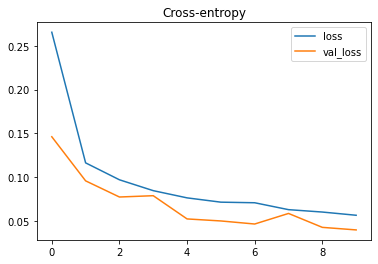

In [11]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")

## Test Data 預測，並整理成輸出檔案

In [12]:
submit_result = lenet_5_model.predict(test_x)
submit_result = pd.DataFrame(submit_result)
submit_result

,0,1,2,3,4,5,6,7,8,9
0,2.543148e-05,0.000037,0.998767,0.000792,3.023936e-05,2.490526e-06,8.772286e-06,0.000061,0.000272,3.833937e-06
1,9.979632e-01,0.000001,0.000039,0.000021,8.754239e-05,3.414135e-04,1.438756e-03,0.000002,0.000049,5.703596e-05
2,2.494415e-04,0.000347,0.004094,0.009879,8.542408e-03,1.036215e-03,3.037870e-04,0.003410,0.055399,9.167395e-01
3,6.957451e-01,0.000023,0.015555,0.006488,1.708616e-03,4.167575e-03,1.364129e-02,0.000416,0.012130,2.501265e-01
4,7.073600e-07,0.000238,0.001285,0.997162,4.617804e-06,4.079725e-04,2.458850e-05,0.000039,0.000710,1.281007e-04
...,...,...,...,...,...,...,...,...,...,...
27995,2.138932e-05,0.000005,0.000123,0.004520,1.231004e-02,3.192614e-03,1.650672e-04,0.004614,0.002664,9.723858e-01
27996,6.376404e-07,0.000025,0.000094,0.000574,5.978407e-05,9.642440e-06,2.897202e-08,0.989068,0.000003,1.016589e-02
27997,2.606501e-09,0.000014,0.000005,0.999914,1.301650e-07,4.427234e-05,2.922121e-07,0.000009,0.000008,5.539680e-06
27998,1.302858e-03,0.001347,0.002004,0.009235,6.144289e-02,4.265128e-03,9.787111e-04,0.093929,0.002686,8.228086e-01


In [13]:
submit_output_list = submit_result.transpose().idxmax()
submit_output_list

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Length: 28000, dtype: int64

In [14]:
submit_data = pd.read_csv('./digit-recognizer/sample_submission.csv')
submit_data['Label'] = submit_output_list

In [15]:
submit_data.to_csv("output.csv", index = False)